# Ecosistema de visualización en Python

## Ecosistema de visualización en Python

Python es un lenguaje muy usado en Ciencia de Datos, aunque no era su propósito
inicial por lo que las librerías de visualización han ido evolucionando. Hay
múltiples opciones:

![](visualizacion.png){width="80%"}

## Matplotlib

[![](matplotlib.jpg){width="70%"}](https://matplotlib.org/)

- Inspirada en las funciones de visualización de Matlab.

- La mayoría (como seaborn) se basan en esta.

- Es demasiado bajo nivel, se puede usar para ajustar al detalle.

## Seaborn

[![](seaborn.png){width="70%"}](https://seaborn.pydata.org/)

- Más orientada a Ciencias de Datos.

- Permite visualizar directamente DataFrames.

- Permite resaltar/distinguir por un atributo o incluso separar por filas y/o columnas usándolo.

## Altair

- [Altair](https://altair-viz.github.io/) está basada en el **Álgebra de Análisis** (usado por ejemplo por `ggplot2` en **R**).

- Si se pilla el 'truco' puede ser más intuitivo, pero está algo más limitado.

## Bokeh

- [Bokeh](https://bokeh.org/) es una librería de visualización usando JavaScript.

- Mejor para interactivo.

## Plotly

[![](plotly.png){width="70%"}](https://plotly.com/python/)

- Parte de un ecosistema de una empresa.

- Permite compartir entre investigadores (visualiza en servidor).

- Se puede combinar con **[Dash](https://plotly.com/dash/)** (similar a Shiny in
  R).

## Plotnine

[![](plotnine.png){width="70%"}](https://plotnine.readthedocs.io/en/stable/)

- [Plotnine]((https://plotnine.readthedocs.io/en/stable/)) Implementa el
 interfaz de `ggplot2`.
     - No completamente.

- Presenta interés para quien quiera usar el mismo interfaz que en R.

## Veremos

Recomendamos Seaborn y Altair, principalmente.

- Ambos: Descriptivos, más alto nivel que matplotlib o pandas. Soportan *DataFrames*.

- Seaborn: Sobre matplotlib.

- Altair: Formato web.

En los siguientes ejemplos usaré seaborn.

Para las prácticas podréis usar el que queráis, no limitaros a ellas.

# Primeras visualizaciones

## Nomenclatura

En la documentación suele aparecer `fig` y `axis`, cuidado.

- fig: Es todo el área a pintar (una o varias figuras juntas).
- axis: Es realmente una figura, no unas coordenadas.

Hay un interfaz más básico, pero lo mejor es el moderno, que permite crear
fácilmente subfiguras:

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt
import numpy as np

## Imagen de ejemplo

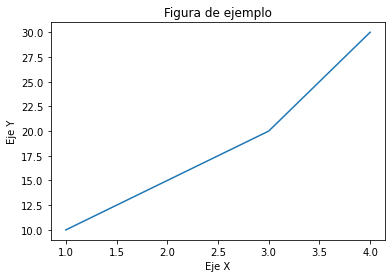

In [2]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4],[10,15,20,30])
ax.set_title("Figura de ejemplo")
ax.set_xlabel("Eje X")
ax.set_ylabel("Eje Y")
plt.show()

---

Se pueden crear varias figuras

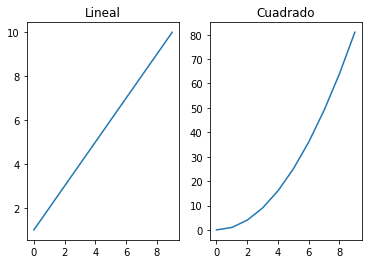

In [3]:
fig, axs = plt.subplots(1, 2)
x = np.arange(10)
axs[0].plot(x,x+np.ones(len(x)))
axs[1].plot(x, np.power(x,2))
axs[0].set_title("Lineal")
axs[1].set_title("Cuadrado")
plt.show()

## Visualizando

Vamos a cargar un dataset clásico y luego analizarlo con visualizaciones.

Uno con datos sobre sueldos.

In [4]:
import pandas as pd
pop = pd.read_csv("CPS85.csv")
print(pop.columns.tolist())
pop.head(3)

['wage', 'educ', 'race', 'sex', 'hispanic', 'south', 'married', 'exper', 'union', 'age', 'sector']


,wage,educ,race,sex,hispanic,south,married,exper,union,age,sector
0,9.0,10,W,M,NH,NS,Married,27,Not,43,const
1,5.5,12,W,M,NH,NS,Married,20,Not,38,sales
2,3.8,12,W,F,NH,NS,Single,4,Not,22,sales


Otro *dataset* son distintos pingüinos. Es un problema de clasificación
(*specie*) similar al *iris*.

In [5]:
penguins = sns.load_dataset("penguins")
print(penguins.columns.tolist())
penguins.head(3)

['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


## Seaborn

Antes de empezar comento algunas características:

- Las funciones trabajan con un DataFrame, por medio del parámetro `data`.
- Se puede identificar para cada dimensión, color, tamaño, ... el nombre de un atributo.
- Se pueden crear distintas figuras (por filas, columnas, ...).

Hay un excelente tutorial _online_ en [https://seaborn.pydata.org/tutorial/introduction.html](https://seaborn.pydata.org/tutorial/introduction.html).

In [6]:
#| echo: false
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

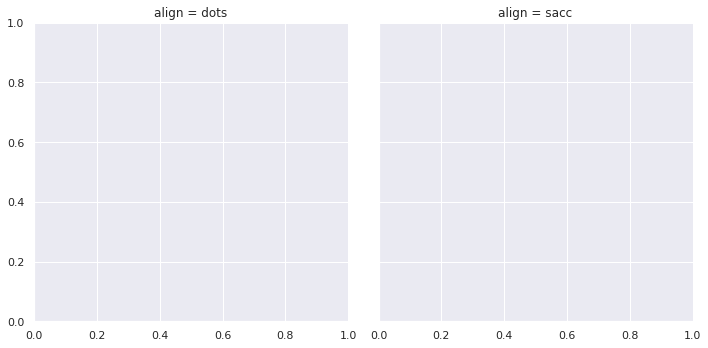

In [7]:
#| echo: false
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False),
)
plt.show()

---

Posee muchas funciones distintas:

- scatterplot: Visualización de instancias como puntos.

- lineplot: Visualiza las instancias como puntos.

- lmplot: Visualiza como puntos, y lo aproxima.

- barplot: Diagramas de barras (incluyendo líneas de error).

- swarmplot: Visualiza en forma de violín.

- boxplot: Distribución usando boxplot.

- ...

----

Sin embargo, es mejor limilarse a tres funciones:
![](seaborn_opciones.png)

Se distingue el concreto mediante el parámetro *kind*.

Ventajas: permite múltiples figuras a la vez según un criterio.

## Visualizando sueldos

. . .

Es una distribución, por tanto usamos **displot**.

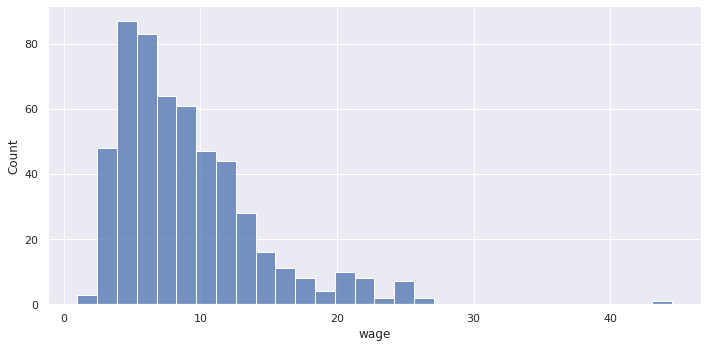

In [8]:
sns.displot(x="wage", data=pop, aspect=2)
plt.show()

Se puede añadir como función kde.

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

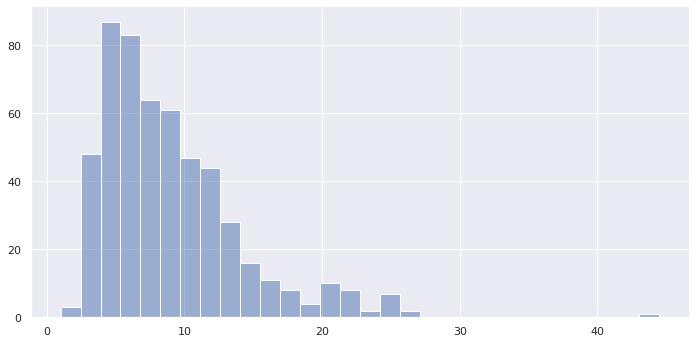

In [9]:
sns.displot(x="wage", data=pop, aspect=2, kde=True)
plt.show()

---

O directamente solo el kde:

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

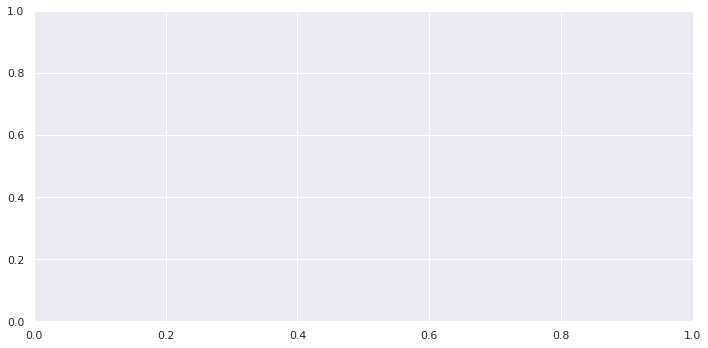

In [10]:
sns.displot(x="wage", data=pop, aspect=2, kind="kde")
plt.show()

También podríamos mostrarlo de valor categórico:

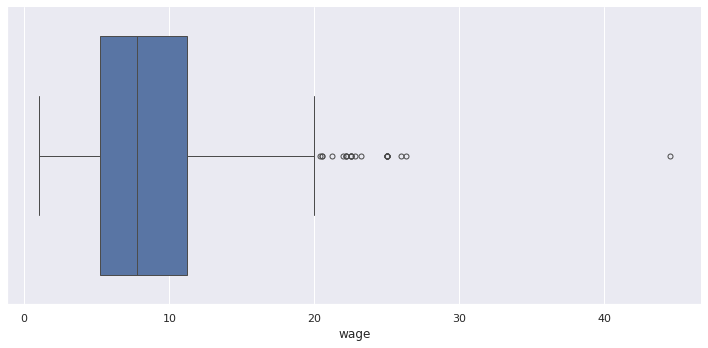

In [11]:
sns.catplot(x="wage", data=pop, aspect=2, kind="box")
plt.show()

## Altair

Altair tiene una sintaxis muy homogénea:

In [12]:
import altair as alt

Ventajas:

- Permite aplicar transformaciones.

- Permite poner en una variable expresión (count(), max(), ...).

- Sintaxis muy homogénea.

La sintaxis es:

```python
alt.Chart(df).mark_xxxx().encode(
    x=...
    y=...
)
```


Definir el tipo de un datos como '*Variable*:*Tipo*' indicando el tipo de datos.

Tipo:

- 'Q': Valor real.
- 'O': Valor ordinal.
- 'N': Valor como categórico.


---

Vamos a visualizar las gráficas anteriores con `Altair`.

. . .

In [13]:
alt.Chart(pop).mark_bar().encode(
    alt.X('wage:Q', bin=alt.Bin(step=1)),
    y='count():O',
).properties(width=800, height=400)

alt.Chart(...)

Ahora como líneas.

In [14]:
alt.Chart(pop).mark_line().encode(
    alt.X('wage:Q', bin=alt.Bin(step=1)),
    y='count():O',
).properties(width=800, height=400)

alt.Chart(...)

---

Ahora como boxplot.

In [15]:
alt.Chart(pop).mark_boxplot(size=50).encode(
    x='wage:Q',
).properties(width=800, height=400)

alt.Chart(...)

## Relación sueldo y formación

Para mostrar diferencias vamos a mostrar el sueldo con los distintas funciones genéricas.

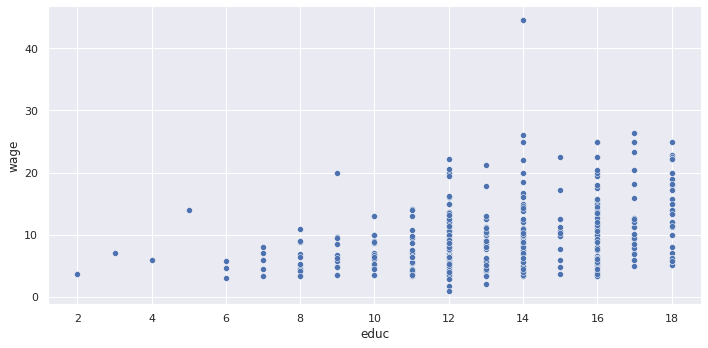

In [16]:
sns.relplot(x="educ", y="wage", data=pop, aspect=2)
plt.show()

In [17]:
alt.Chart(pop).mark_point().encode(
    y='wage:Q',
    x='educ:Q',
).properties(width=800, height=400)

alt.Chart(...)

---

También permite mostrar la media y remarca el 95% del intervalo de confianza.

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

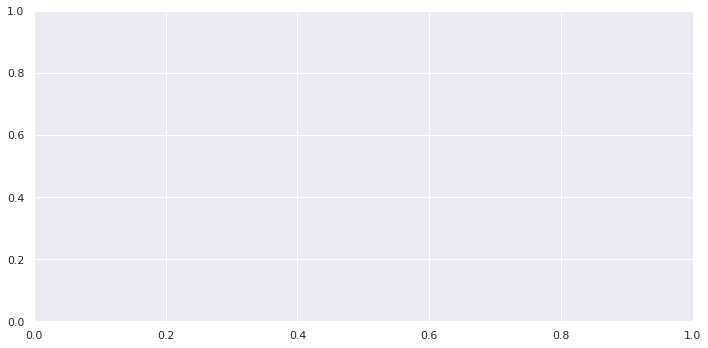

In [20]:
sns.relplot(x="educ", y="wage", data=pop, aspect=2, kind="line")
plt.show()

Directamente se confirma con el box-plot.

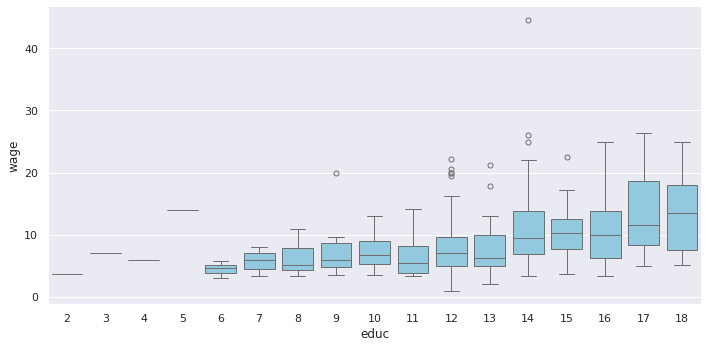

In [21]:
sns.catplot(x="educ", y="wage", data=pop, aspect=2, kind="box", color="skyblue")
plt.show()

. . .

Se ve que con mayor nivel educativo mayor es la variabilidad.

---


En Altair es muy directo:

In [22]:
alt.Chart(pop).mark_boxplot(size=30).encode(
    y='wage:Q',
    x='educ:Q',
).configure_mark(
    color='skyblue'
).properties(width=800, height=400)

alt.Chart(...)

Otra forma, diagrama de barras:

. . .

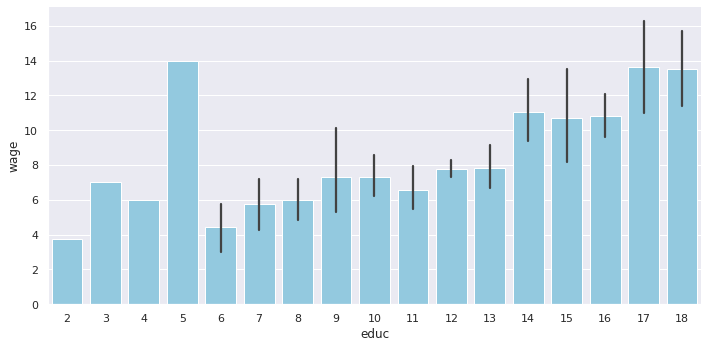

In [23]:
sns.catplot(y="wage", x="educ", data=pop, kind="bar",
            color="skyblue", aspect=2)
plt.show()

----

Se pueden quitar las barras de error:

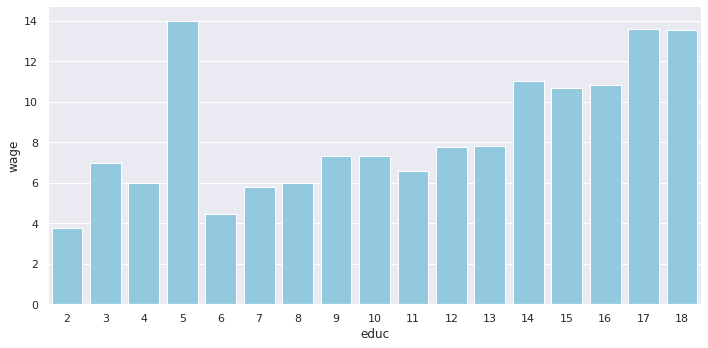

In [24]:
sns.catplot(y="wage", x="educ", data=pop, kind="bar", errorbar=None,
            color="skyblue", aspect=2)
plt.show()

----

In [25]:
alt.Chart(pop).mark_bar(size=30).encode(
    y='mean(wage):Q',
    x='educ:Q',
).configure_mark(
    color='skyblue'
).properties(width=800, height=400)

alt.Chart(...)

----


¿Y si queremos ver las combinaciones más numerosas?

. . .

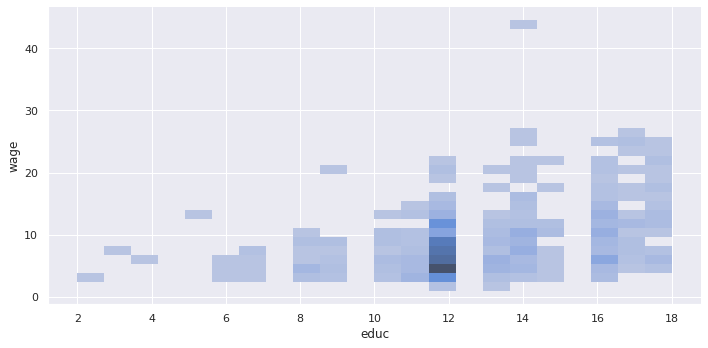

In [26]:
sns.displot(y="wage", x="educ", data=pop, kind="hist", aspect=2)
plt.show()

. . .

Un nivel educativo de 12 con sueldo inferior a 10 es común.

----

In [27]:
alt.Chart(pop).mark_rect(color='skyblue').encode(
    alt.Y('wage:Q', bin=alt.Bin(step=1)),
    alt.X('educ:Q', bin=alt.Bin(step=1)),
    alt.Color('count():Q', scale=alt.Scale(scheme='greenblue')),
).properties(width=800, height=400)

alt.Chart(...)

# Diferenciando por más atributos

Si queremos ver la influencia sobre una clase, se puede usar el atributo hue:

- Permite repetir la gráfica al lado discriminando por ese atributo.

- Añade nuevo color.

- Se refleja en la leyenda.

---

Ejemplo: Distribución considerando el sexo.

. . .

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

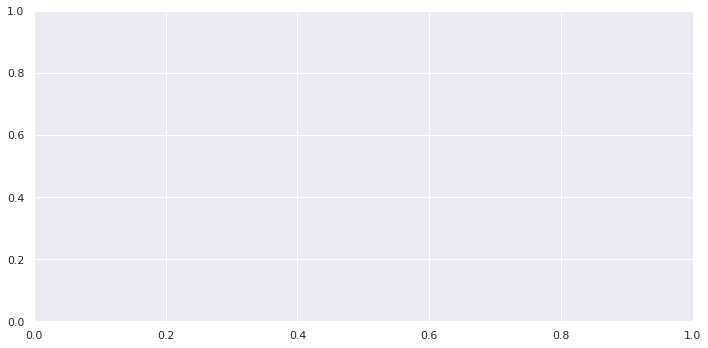

In [28]:
sns.displot(x="wage", hue="sex", alpha=0.5, data=pop, kind="kde", aspect=2)
plt.show()

In [29]:
alt.Chart(pop).mark_line().encode(
    alt.X('wage:Q',bin=alt.Bin(step=1)),
    y='count():Q',
    color=alt.Color('sex:N',sort=alt.SortOrder('descending')),
).properties(width=800, height=400)

alt.Chart(...)

---

El box-plot lo visualiza mejor:


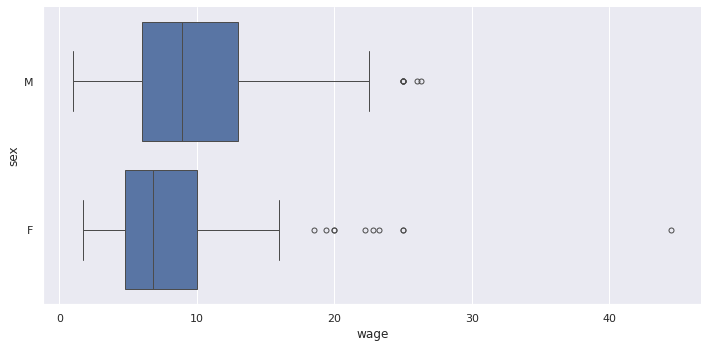

In [30]:
sns.catplot(x="wage", y="sex", data=pop, kind="box", aspect=2)
plt.show()

In [31]:
alt.Chart(pop).mark_boxplot(size=30,color='skyblue').encode(
    x='wage:Q',
    y='sex:N',
    color='sex:N'
).properties(width=800, height=400)

alt.Chart(...)

---

Analizamos con diagrama de barra:

. . .

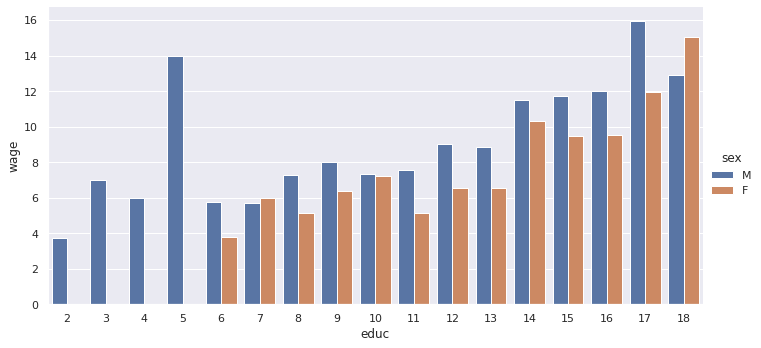

In [32]:
sns.catplot(y="wage", x="educ", data=pop, hue="sex", kind="bar",
            errorbar=None, aspect=2); plt.show()

In [33]:
alt.Chart(pop).mark_bar(size=30,color='skyblue').encode(
    column='educ:Q',
    y='mean(wage):Q',
    color='sex:N',
    x='sex:N'
).properties(width=50, height=400)

alt.Chart(...)

## Subfiguras por criterio

A menudo nos interesa visualizar ciertos datos de forma separada.

Se podría hacer haciendo selecciones usando pandas, pero la librería lo permite.

AVamos a usar el otro *datasets*, el de los pingüinos.

Primero vamos a mostrar para los tamaños la especie que es

---

In [ ]:
sns.relplot(x="bill_length_mm", y="bill_depth_mm", data=penguins, aspect=2)
plt.show()

In [ ]:
sns.relplot(x="bill_length_mm", y="bill_depth_mm", data=penguins,
            hue="species", aspect=2)
plt.show()

. . .

Tiene pinta de ser bastante separables, de todas formas vamos a analizar por
islas.

---

In [ ]:
scale=alt.Scale(zero=False)
alt.Chart(penguins).mark_point().encode(
    x=alt.X('bill_length_mm:Q',scale=scale),
    y=alt.Y('bill_depth_mm:Q',scale=scale),
    color='species'
).properties(width=800,height=400)

Podemos usar otros atributos, pero a veces no es claro:

In [ ]:
sns.relplot(x="bill_length_mm", y="bill_depth_mm", data=penguins,
            hue="species", style='island', aspect=2)
plt.show()

---

In [ ]:
sns.relplot(x="bill_length_mm", y="bill_depth_mm", data=penguins,
            hue="species", col="island", aspect=1)
plt.show()

Se puede limitar usando *col_wrap* y *row_wrap* para que no sea tan alargado.

In [ ]:
# setting the dimensions of the plot
g=sns.relplot(x="bill_length_mm", y="bill_depth_mm", data=penguins,
              hue="species", col="island", col_wrap=2,
              height=2.5, aspect=1.5)
plt.show()

---

Desde `Altair` también es fácil.

In [ ]:
alt.Chart(penguins).mark_point().encode(
    x = 'bill_length_mm:Q',
    y = 'bill_depth_mm:Q',
    color='species:N',
    column='island:N'
).properties(width=250, height=400)

![](themes.png){height="90%"}

---

In [ ]:
sns.set_theme(style="whitegrid")
sns.catplot(y="wage", x="educ", data=pop, hue="sex", kind="bar",
            errorbar=None, aspect=2)
plt.show()

In [ ]:
g=sns.catplot(y="wage", x="educ", data=pop, hue="sex", kind="bar",
            errorbar=None, aspect=2)
g.set(xlabel="Educación", ylabel="Sueldo")
plt.show()

---

Falta la leyenda, se cambia con plt.legend:

In [ ]:
g=sns.catplot(y="wage", x="educ", data=pop, hue="sex", kind="bar",
              errorbar=None, aspect=2, legend=False)
g.set(xlabel="Educación", ylabel="Sueldo")
plt.legend(title="Sexo")
plt.show()

Re-etiquetar:

In [ ]:
g=sns.catplot(y="wage", x="educ", data=pop, hue="sex", kind="bar",
              errorbar=None, aspect=2, legend=False)
g.set(xlabel="Educación", ylabel="Sueldo")
plt.legend(title="Sexo", labels=["Hombre", "Mujer"])
plt.show()

---

Localización

In [ ]:
g=sns.catplot(y="wage", x="educ", data=pop, hue="sex", kind="bar",
              errorbar=None, aspect=2, legend=False)
g.set(xlabel="Educación", ylabel="Sueldo")
plt.legend(title="Sexo", labels=["Hombre", "Mujer"],
           bbox_to_anchor= (1.02,1))
plt.show()

Usando **move_legend**

In [ ]:
g=sns.catplot(y="wage", x="educ", data=pop, hue="sex", kind="bar",
              errorbar=None, aspect=2)
g.set(xlabel="Educación", ylabel="Sueldo")
sns.move_legend(g, "upper left", bbox_to_anchor=(0.92, 0.6),
                title="Sexo", labels=["Hombre", "Mujer"])
plt.show()

---

Dado que se pueden crear subfiguras para el título es bueno usar
'XX.figure.suptitle'.

In [ ]:
g=sns.relplot(x="bill_length_mm", y="bill_depth_mm", data=penguins,
              hue="species", col="island", col_wrap=2,
              height=2.5, aspect=1.5)
g.figure.suptitle("Distribución por islas")
plt.show()

## Personalizando en Altair

Personalizando una gráfica en `Altair` es más intuitivo, al ser más explícito.

In [ ]:
scale=alt.Scale(zero=False)
alt.Chart(penguins).mark_point().encode(
    x=alt.X('bill_length_mm:Q',scale=scale),
    y=alt.Y('bill_depth_mm:Q',scale=scale),
    color='species'
).properties(width=800,height=400)

In [ ]:
scale=alt.Scale(zero=False)
alt.Chart(penguins).mark_point().encode(
    x=alt.X('bill_length_mm:Q',scale=scale, title="Longitud (mm)"),
    y=alt.Y('bill_depth_mm:Q',scale=scale, title="Profundidad (mm)"),
    color=alt.Color('species', title="Especie")
).properties(width=800,height=400)

---

`Altair` es interactivo:

In [ ]:
scale=alt.Scale(zero=False)
alt.Chart(penguins).mark_point().encode(
    x=alt.X('bill_length_mm:Q',scale=scale, title="Longitud (mm)"),
    y=alt.Y('bill_depth_mm:Q',scale=scale, title="Profundidad (mm)"),
    color=alt.Color('species', title="Especie")
).properties(width=800,height=400).interactive()

Altair también permite asociar diagramas:


In [ ]:
#| echo: false
scale=alt.Scale(zero=False)
brush = alt.selection_interval()

p1=alt.Chart(penguins).mark_point().encode(
    x=alt.X('bill_length_mm:Q',scale=scale, title="Longitud (mm)"),
    y=alt.Y('bill_depth_mm:Q',scale=scale, title="Profundidad (mm)"),
    color=alt.Color('species', title="Especie")
).properties(width=800,height=400).add_selection(brush)

p2=alt.Chart(penguins).mark_bar().encode(
    y='species:N',
    color='species:N',
    x='count(species):O'
).transform_filter(brush)

alt.vconcat(p1,p2)

---

Altair también permite asociar diagramas:

In [ ]:
#| echo: true
#| eval: false
scale=alt.Scale(zero=False)
brush = alt.selection_interval()

p1=alt.Chart(penguins).mark_point().encode(
    x=alt.X('bill_length_mm:Q',scale=scale, title="Longitud (mm)"),
    y=alt.Y('bill_depth_mm:Q',scale=scale, title="Profundidad (mm)"),
    color=alt.Color('species', title="Especie")
).properties(width=800,height=400).add_selection(brush)

p2=alt.Chart(penguins).mark_bar().encode(
    y='species:N',
    color='species:N',
    x='count(species):O'
).transform_filter(brush)

alt.vconcat(p1,p2)

## Ejercicios de visualización

Vamos a usar un datasets *tips* existen datos de consumo en un restaurante. Indica para cada
consumición el precio *total_bill*, la *propina* y datos del cliente (*sex*,
*smoker*), el día de la semana, y la hora (*Lunch*, *Dinner*).

In [34]:
tips = sns.load_dataset("tips")

In [49]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


## Ejercicios de visualización

1. Visualizar la distribución de propinas en función de la factura total.

2. Igual pero destacando por la hora.

3. Mostrar la frecuencia distinguiendo por sexo del cliente.

4. Mostrar la frecuencia distinguiendo por sexo en función de la hora.

5. Crear el diagrama (lmplot) de la relación propina y factura en función de la
   hora.

6. Mostrar en un box-plot la factura en función de la hora.

7. Igual que el anterior pero distinguiendo por el sexo.

## Ejercicios de visualización

8. Mostrar un kde de la factura distinguiendo por sexo y separando por la hora.

9. Calcular el ratio y visualizar las facturas y el ratio separando en base a la hora.

10. ¿Ser fumador influye?

11. ¿La hora influye en la factura? ¿Y en el ratio? Visualiza para justificarlo.

12. Visualizar la distribución del ratio para cada hora.

13. Crear un diagrama de barras para comparar el ratio promedio por cada sexo
    para cada hora. ¿La diferencia es relevante?

14. Crear un diagrama de barras para comparar el ratio promedio por cada sexo
    separando si es fumador. ¿La diferencia es relevante?

15. ¿Está bien balanceados los experimentos respecto a la hora, el sexo, o si
    son fumador?

16. Mejora y "traduce" uno de las gráficas complejas anteriores.

1. Visualizar la distribución de propinas en función de la factura total.

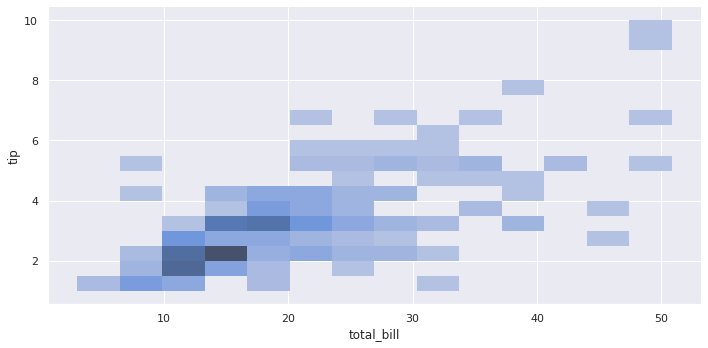

In [48]:
sns.displot(x="total_bill", y="tip", data=tips, aspect=2, kind="hist")
plt.show()

2. Igual pero destacando por la hora.

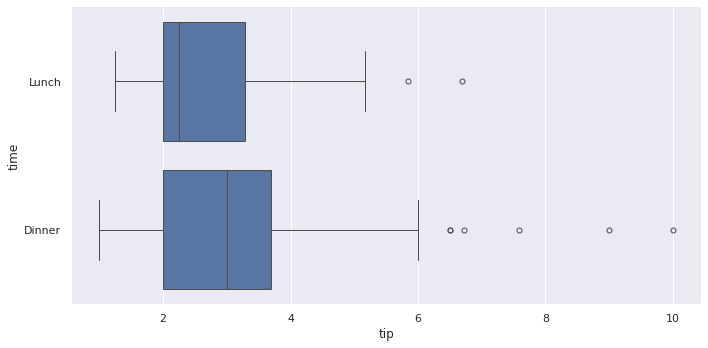

In [51]:
sns.catplot(x="tip", y="time", data=tips, aspect=2, kind="box")
plt.show()

3. Mostrar la frecuencia distinguiendo por sexo del cliente.


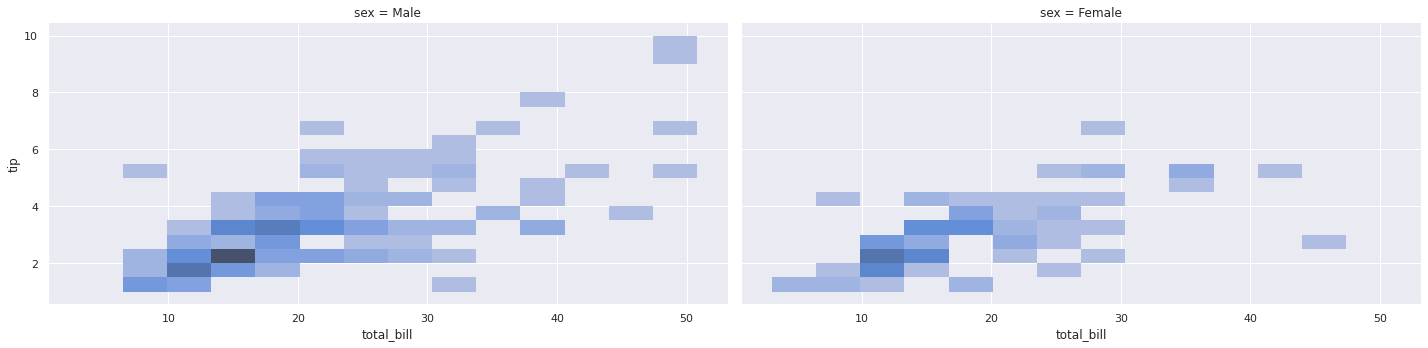

In [58]:
sns.displot(x="total_bill",y="tip",col="sex",data=tips,aspect=2,kind="hist")

4. Mostrar la frecuencia distinguiendo por sexo en función de la hora.


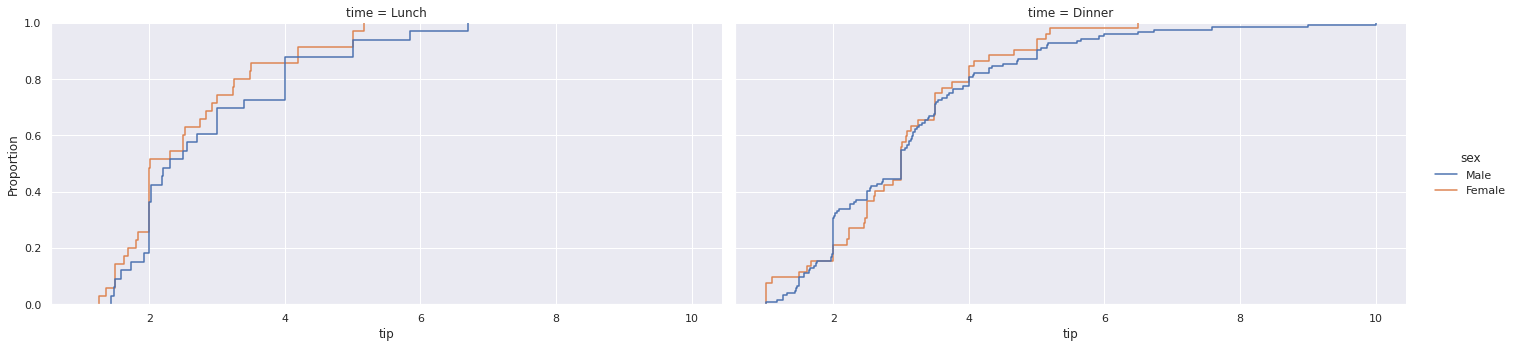

In [66]:
sns.displot(x="tip",col="time",hue="sex",data=tips,aspect=2,kind="ecdf")

5. Crear el diagrama (lmplot) de la relación propina y factura en función de la
   hora.

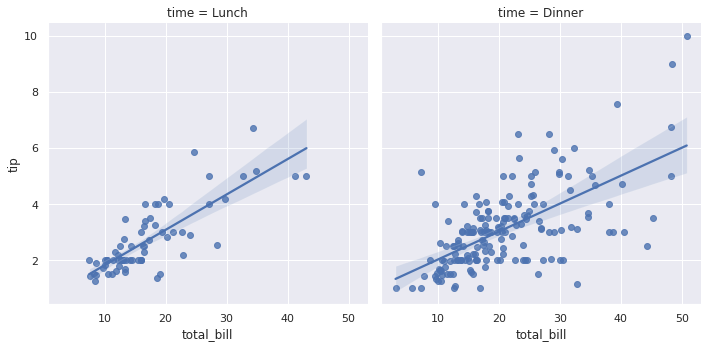

In [68]:
sns.lmplot(data=tips,x="total_bill",y="tip",col="time")

6. Mostrar en un box-plot la factura en función de la hora.

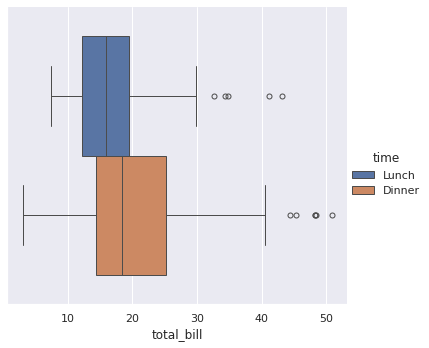

In [70]:
sns.catplot(data=tips,x="total_bill",hue="time",kind="box")